In [1]:
#Dependencies
import requests
import json
import pandas as pd
import numpy as np
from config import api_key
import pprint as pp
import matplotlib.pyplot as plt


In [2]:
#read excel files
dispensary_df = pd.read_csv("CO Recreational Marijuana Stores.csv")

license = dispensary_df['License #']
street = dispensary_df['Street']
city = dispensary_df['City ']
zip = dispensary_df['Zip']

dispensary_df = pd.DataFrame({
    
    "License": license,
    "Street": street,
    "City": city,
    "Zipcode": zip,
})

zips_in_city = dispensary_df.groupby('City')['Zipcode'].unique()

dispensary_df.head()



,License,Street,City,Zipcode
0,402R-00763,10185 West 49th Avenue,Wheat Ridge,80033
1,402R-00581,17034 Highway 17,Moffat,81143
2,402R-00081,"1617 Wazee Street, Unit B",Denver,80202
3,402R-00757,2800 West Hampden Avenue,Sheridan,80110
4,402R-00664,155 North Federal Boulevard,Denver,80219


In [3]:
zip_to_city_df = pd.read_csv("zipcityinfo.csv")

city = zip_to_city_df['City']
county = zip_to_city_df['County']
zip = zip_to_city_df['Zip Code']


zip_to_city_df = pd.DataFrame({
    
    "City": city,
    "County": county,
    "Zipcode": zip,    
})

zip_to_city_df.head()

FileNotFoundError: File b'zipcityinfo.csv' does not exist

In [33]:
#2012 income df
income_2012_df = pd.read_csv("Income/income_2012.csv")
income_2013_df = pd.read_csv("Income/income_2013.csv")
income_2014_df = pd.read_csv("Income/income_2014.csv")
income_2015_df = pd.read_csv("Income/income_2015.csv")
income_2016_df = pd.read_csv("Income/income_2016.csv")


zip = income_2012_df['Id2']

house_hold_12 = income_2012_df['Households; Estimate; Total']
house_hold_margin_12 = income_2012_df['Households; Margin of Error; Total']
house_hold_income_12 = income_2012_df['Households; Estimate; Median income (dollars)']
household_income_12 = pd.to_numeric(house_hold_income_12, errors='coerce').fillna(0, downcast='infer')
house_hold_income_margin_12 = income_2012_df['Households; Margin of Error; Median income (dollars)']


house_hold_13 = income_2013_df['Households; Estimate; Total']
house_hold_margin_13 = income_2013_df['Households; Margin of Error; Total']
house_hold_income_13 = income_2013_df['Households; Estimate; Median income (dollars)']
household_income_13 = pd.to_numeric(house_hold_income_13, errors='coerce').fillna(0, downcast='infer')
house_hold_income_margin_13 = income_2013_df['Households; Margin of Error; Median income (dollars)']

house_hold_14 = income_2014_df['Households; Estimate; Total']
house_hold_margin_14 = income_2014_df['Households; Margin of Error; Total']
house_hold_income_14 = income_2014_df['Households; Estimate; Median income (dollars)']
household_income_14 = pd.to_numeric(house_hold_income_14, errors='coerce').fillna(0, downcast='infer')
house_hold_income_margin_14 = income_2014_df['Households; Margin of Error; Median income (dollars)']

house_hold_15 = income_2015_df['Households; Estimate; Total']
house_hold_margin_15 = income_2015_df['Households; Margin of Error; Total']
house_hold_income_15 = income_2015_df['Households; Estimate; Median income (dollars)']
household_income_15 = pd.to_numeric(house_hold_income_15, errors='coerce').fillna(0, downcast='infer')
house_hold_income_margin_15 = income_2015_df['Households; Margin of Error; Median income (dollars)']

house_hold_16 = income_2016_df['Households; Estimate; Total']
house_hold_margin_16 = income_2016_df['Households; Margin of Error; Total']
house_hold_income_16 = income_2016_df['Households; Estimate; Median income (dollars)']
household_income_16 = pd.to_numeric(house_hold_income_16, errors='coerce').fillna(0, downcast='infer')
house_hold_income_margin_16 = income_2016_df['Households; Margin of Error; Median income (dollars)']


income_clean_df = pd.DataFrame({
    
    "Zipcode": zip,
    
    "Total Households 2012": house_hold_12,
    "Total Households 2012 Margin of Error": house_hold_margin_12,
    "Total Households Income 2012": household_income_12,
    "Total Households Income 2012 Margin of Error": house_hold_income_margin_12,
    
    "Total Households 2013": house_hold_13,
    "Total Households 2013 Margin of Error": house_hold_margin_13,
    "Total Households Income 2013": household_income_13,
    "Total Households Income 2013 Margin of Error": house_hold_income_margin_13,
    
    "Total Households 2014": house_hold_14,
    "Total Households 2014 Margin of Error": house_hold_margin_14,
    "Total Households Income 2014": household_income_14,
    "Total Households Income 2014 Margin of Error": house_hold_income_margin_14,
    
    "Total Households 2015": house_hold_15,
    "Total Households 2015 Margin of Error": house_hold_margin_15,
    "Total Households Income 2015": household_income_15,
    "Total Households Income 2015 Margin of Error": house_hold_income_margin_15,
    
    "Total Households 2016": house_hold_16,
    "Total Households 2016 Margin of Error": house_hold_margin_16,
    "Total Households Income 2016": household_income_16,
    "Total Households Income 2016 Margin of Error": house_hold_income_margin_16,
    
})

income_clean_df.head()


,Zipcode,Total Households 2012,Total Households 2012 Margin of Error,Total Households Income 2012,Total Households Income 2012 Margin of Error,Total Households 2013,Total Households 2013 Margin of Error,Total Households Income 2013,Total Households Income 2013 Margin of Error,Total Households 2014,...,Total Households Income 2014,Total Households Income 2014 Margin of Error,Total Households 2015,Total Households 2015 Margin of Error,Total Households Income 2015,Total Households Income 2015 Margin of Error,Total Households 2016,Total Households 2016 Margin of Error,Total Households Income 2016,Total Households Income 2016 Margin of Error
0,67879.0,493.0,46.0,52212.0,10201,493.0,47.0,52847.0,7816,471.0,...,51023.0,8159,487.0,40.0,47750.0,5443,478,49,47000,9747
1,80002.0,8264.0,311.0,49036.0,3339,8304.0,259.0,50425.0,5308,8107.0,...,51027.0,4668,8227.0,246.0,48627.0,5229,8196,234,53186,3559
2,80003.0,13639.0,305.0,56398.0,3029,13630.0,333.0,54688.0,3112,13844.0,...,56833.0,3275,14198.0,325.0,57934.0,3295,13970,353,59098,2399
3,80004.0,14527.0,274.0,66043.0,3732,14502.0,266.0,67830.0,3601,14759.0,...,67371.0,2615,14814.0,326.0,67824.0,3425,14915,305,70968,3676
4,80005.0,10315.0,249.0,83125.0,4074,10243.0,220.0,84501.0,3015,10396.0,...,83819.0,4787,10671.0,246.0,84900.0,3952,10923,203,89189,5256


In [5]:
# State total
total_2012 = household_income_12.sum()
total_2013 = household_income_13.sum()
total_2014 = household_income_14.sum()
total_2015 = household_income_15.sum()
total_2016 = household_income_16.sum()

#total_before = total_2012 + total_2013 / 2
#total_after = total_2014 + total_2015 + total_2016 / 3




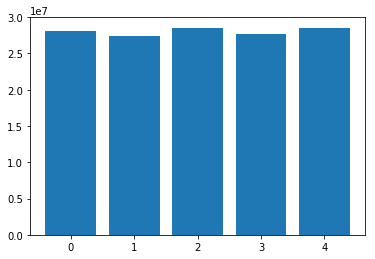

In [90]:
years = ["2012", "2013", "2014", "2015", "2016"]
income = [total_2012, total_2013, total_2014, total_2015, total_2016]
x_axis = np.arange(len(years))
plt.bar(x_axis, income)
plt.show()

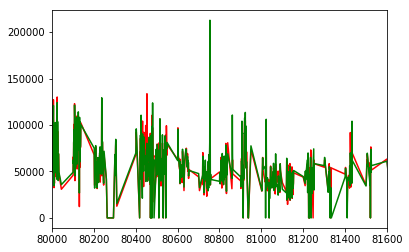

<Figure size 5760x5040 with 0 Axes>

In [35]:
zip_x = income_clean_df["Zipcode"]
income12_y = income_clean_df["Total Households Income 2012"]

income14_y = income_clean_df["Total Households Income 2014"]


plt.plot(zip_x, income12_y, color="red", label="2012")

plt.plot(zip_x, income14_y, color="green", label="2014")


plt.xlim(80000, 81600)
plt.figure(figsize=(80, 70))
#plt.savefig("../income.png")
plt.show()

In [ ]:
lat_plot = weather_df["Lat"]
temp_plot = weather_df["Max Temp"]

plt.scatter(lat_plot, 
            temp_plot, 
            c="blue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (9/13/18)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)th

ValueError: x and y must be the same size

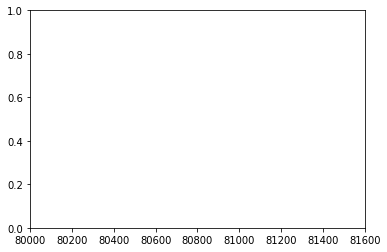

In [27]:
x1 = income_clean_df["Zipcode"]

income2012 = household_income_12



plt.xlim(80000, 81600)
t = plt.scatter(x1, income2012, color="lightcoral", edgecolors="black", alpha=0.7, linewidth=.7)





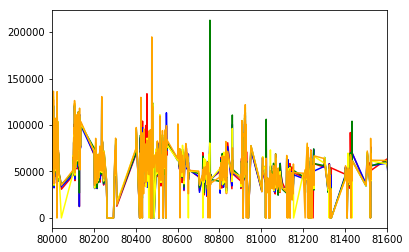

<Figure size 5760x5040 with 0 Axes>

In [22]:

zip_x = income_clean_df["Zipcode"]
income12_y = income_clean_df["Total Households Income 2012"]
income13_y = income_clean_df["Total Households Income 2013"]
income14_y = income_clean_df["Total Households Income 2014"]
income15_y = income_clean_df["Total Households Income 2015"]
income16_y = income_clean_df["Total Households Income 2016"]

plt.plot(zip_x, income12_y, color="red", label="2012")
plt.plot(zip_x, income13_y, color="blue", label="2013")
plt.plot(zip_x, income14_y, color="green", label="2014")
plt.plot(zip_x, income15_y, color="yellow", label="2015")
plt.plot(zip_x, income16_y, color="orange", label="2016")

plt.xlim(80000, 81600)
plt.figure(figsize=(80, 70))
#plt.savefig("../income.png")
plt.show()

In [ ]:
plt.plot(zip_x, income12_y, color="red", label="2012")
plt.xlim(80000, 81700)
plt.show()

In [ ]:
plt.plot(zip_x, income13_y, color="blue", label="2013")
plt.xlim(80000, 81700)
plt.show()

In [ ]:
plt.plot(zip_x, income14_y, color="green", label="2014")
plt.xlim(80000, 81700)
plt.show()

In [ ]:
plt.plot(zip_x, income15_y, color="yellow", label="2015")
plt.xlim(80000, 81700)
plt.show()

In [ ]:
plt.plot(zip_x, income16_y, color="orange", label="2016")
plt.xlim(80000, 81700)
plt.show()

In [ ]:
#merge on zip for cities and export csv

income_clean_df = pd.merge(zip_to_city_df, income_clean_df, on='Zipcode', how='left')

income_clean_df.to_csv("Income/semi_cleaned_income.csv", index=False)

In [52]:
#read excel files
employment_df = pd.read_csv("Employment/employment_2012.csv")

zip = employment_df['Id2']

population = employment_df['Total; Estimate; Population 16 years and over']
population_margin = employment_df['Total; Margin of Error; Population 16 years and over']
population_unemployment = employment_df['Unemployment rate; Estimate; Population 16 years and over']
total_unemployment = pd.to_numeric(population_unemployment, errors='coerce').fillna(0, downcast='infer')
population_unemployment_margin = employment_df['Unemployment rate; Margin of Error; Population 16 years and over']

sixteen = employment_df['Total; Estimate; AGE - 16 to 19 years']
sixteen_margin = employment_df['Total; Margin of Error; AGE - 16 to 19 years']
sixteen_unemployment = employment_df['Unemployment rate; Estimate; AGE - 16 to 19 years']
unemployment16 = pd.to_numeric(sixteen_unemployment, errors='coerce').fillna(0, downcast='infer')
sixteen_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 16 to 19 years']

twenty = employment_df['Total; Estimate; AGE - 20 to 24 years']
twenty_margin = employment_df['Total; Margin of Error; AGE - 20 to 24 years']
twenty_unemployment = employment_df['Unemployment rate; Estimate; AGE - 20 to 24 years']
unemployment20 = pd.to_numeric(twenty_unemployment, errors='coerce').fillna(0, downcast='infer')
twenty_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 20 to 24 years']

twenty_five = employment_df['Total; Estimate; AGE - 25 to 44 years']
twenty_five_margin = employment_df['Total; Margin of Error; AGE - 25 to 44 years']
twenty_five_unemployment = employment_df['Unemployment rate; Estimate; AGE - 25 to 44 years']
unemployment25 = pd.to_numeric(twenty_five_unemployment, errors='coerce').fillna(0, downcast='infer')
twenty_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 25 to 44 years']

#thirty = employment_df['Total; Estimate; AGE - 30 to 34 years']
#thirty_margin = employment_df['Total; Margin of Error; AGE - 30 to 34 years']
#thirty_unemployment = employment_df['Unemployment rate; Estimate; AGE - 30 to 34 years']
#thirty_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 30 to 34 years']

#thirty_five = employment_df['Total; Estimate; AGE - 35 to 44 years']
#thirty_five_margin = employment_df['Total; Margin of Error; AGE - 35 to 44 years']
#thirty_five_unemployment = employment_df['Unemployment rate; Estimate; AGE - 35 to 44 years']
#thirty_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 35 to 44 years']

forty_five = employment_df['Total; Estimate; AGE - 45 to 54 years']
forty_five_margin = employment_df['Total; Margin of Error; AGE - 45 to 54 years']
forty_five_unemployment = employment_df['Unemployment rate; Estimate; AGE - 45 to 54 years']
unemployment45 = pd.to_numeric(forty_five_unemployment, errors='coerce').fillna(0, downcast='infer')
forty_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 45 to 54 years']

fifty_five = employment_df['Total; Estimate; AGE - 55 to 64 years']
fifty_five_margin = employment_df['Total; Margin of Error; AGE - 55 to 64 years']
fifty_five_unemployment = employment_df['Unemployment rate; Estimate; AGE - 55 to 64 years']
unemployment55 = pd.to_numeric(fifty_five_unemployment, errors='coerce').fillna(0, downcast='infer')
fifty_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 55 to 64 years']

#sixty = employment_df['Total; Estimate; AGE - 60 to 64 years']
#sixty_margin = employment_df['Total; Margin of Error; AGE - 60 to 64 years']
#sixty_unemployment = employment_df['Unemployment rate; Estimate; AGE - 60 to 64 years']
#sixty_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 60 to 64 years']

sixty_five = employment_df['Total; Estimate; AGE - 65 to 74 years']
sixty_five_margin = employment_df['Total; Margin of Error; AGE - 65 to 74 years']
sixty_five_unemployment = employment_df['Unemployment rate; Estimate; AGE - 65 to 74 years']
unemployment65 = pd.to_numeric(sixty_five_unemployment, errors='coerce').fillna(0, downcast='infer')
sixty_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 65 to 74 years']

seventy_five = employment_df['Total; Estimate; AGE - 75 years and over']
seventy_five_margin = employment_df['Total; Margin of Error; AGE - 75 years and over']
unemployment75 = pd.to_numeric(seventy_five_unemployment, errors='coerce').fillna(0, downcast='infer')
seventy_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 75 years and over']


employment_2012_df = pd.DataFrame({
    
    "Zipcode": zip,
    
    "Total Population 2012": population,
    "Total Population 2012 Margin of Error": population_margin,
    "Total Unemployment 2012": total_unemployment,
    "Total Unemployment 2012 margin of Error": population_unemployment_margin,
    
    "Age Group 16-19 2012": sixteen,
    "Age Group 16-19 2012 Margin of Error": sixteen_margin,
    "Age Group 16-19 2012 Unemployment": unemployment16,
    "Age Group 16-19 2012 Unemployment Margin of Error": sixteen_unemployment_margin,
    
    "Age Group 20-24 2012": twenty,
    "Age Group 20-24 2012 Margin of Error": twenty_margin,
    "Age Group 20-24 2012 Unemployment": unemployment20,
    "Age Group 20-24 2012 Unemployment Margin of Error": twenty_unemployment_margin,
    
    "Age Group 25-44 2012": twenty_five,
    "Age Group 25-44 2012 Margin of Error": twenty_five_margin,
    "Age Group 25-44 2012 Unemployment": unemployment25,
    "Age Group 25-44 2012 Unemployment Margin of Error": twenty_five_unemployment_margin,
    
    "Age Group 45-54 2012": forty_five,
    "Age Group 45-54 2012 Margin of Error": forty_five_margin,
    "Age Group 45-54 2012 Unemployment": unemployment45,
    "Age Group 45-54 2012 Unemployment Margin of Error": forty_five_unemployment_margin,        
    
    "Age Group 55-64 2012": fifty_five,
    "Age Group 55-64 2012 Margin of Error": fifty_five_margin,
    "Age Group 55-64 2012 Unemployment": unemployment55,
    "Age Group 55-64 2012 Unemployment Margin of Error": fifty_five_unemployment_margin,
    
    "Age Group 65-74 2012": sixty_five,
    "Age Group 65-74 2012 Margin of Error": sixty_five_margin,
    "Age Group 65-74 2012 Unemployment": unemployment65,
    "Age Group 65-74 2012 Unemployment Margin of Error": sixty_five_unemployment_margin,
    
    "Age Group 75+ 2012": seventy_five,
    "Age Group 75+ 2012 Margin of Error": seventy_five_margin,
    "Age Group 75+ 2012 Unemployment": unemployment75,
    "Age Group 75+ 2012 Unemployment Margin of Error": seventy_five_unemployment_margin,

})
employment_2012_df.head()

,Zipcode,Total Population 2012,Total Population 2012 Margin of Error,Total Unemployment 2012,Total Unemployment 2012 margin of Error,Age Group 16-19 2012,Age Group 16-19 2012 Margin of Error,Age Group 16-19 2012 Unemployment,Age Group 16-19 2012 Unemployment Margin of Error,Age Group 20-24 2012,...,Age Group 55-64 2012 Unemployment,Age Group 55-64 2012 Unemployment Margin of Error,Age Group 65-74 2012,Age Group 65-74 2012 Margin of Error,Age Group 65-74 2012 Unemployment,Age Group 65-74 2012 Unemployment Margin of Error,Age Group 75+ 2012,Age Group 75+ 2012 Margin of Error,Age Group 75+ 2012 Unemployment,Age Group 75+ 2012 Unemployment Margin of Error
0,67879.0,1020.0,80.0,1.2,1.6,87.0,38.0,0.0,33.8,30.0,...,0.0,16.1,128.0,31.0,0.0,44.6,164.0,35.0,0.0,86.7
1,80002.0,15071.0,757.0,7.0,1.8,703.0,239.0,23.5,15.9,1518.0,...,10.1,3.7,1313.0,227.0,0.0,11.8,757.0,167.0,0.0,25.2
2,80003.0,27595.0,719.0,9.8,1.7,1699.0,319.0,28.1,8.9,2553.0,...,11.9,4.1,2233.0,290.0,6.6,8.1,1670.0,229.0,18.3,27
3,80004.0,28369.0,707.0,8.0,1.3,1595.0,227.0,22.2,8.6,1958.0,...,6.7,2.7,2737.0,200.0,8.3,6.1,3242.0,266.0,0.0,17.9
4,80005.0,21325.0,574.0,6.3,1.1,1635.0,262.0,29.1,11.8,1277.0,...,3.7,2,2162.0,222.0,4.1,3.9,1241.0,228.0,5.7,20


In [53]:
avg_total_2012 = employment_2012_df["Total Unemployment 2012"].mean()
avg_group16_2012 = employment_2012_df["Age Group 16-19 2012 Unemployment"].mean()
avg_group20_2012 = employment_2012_df["Age Group 20-24 2012 Unemployment"].mean()
avg_group25_2012 = employment_2012_df["Age Group 25-44 2012 Unemployment"].mean()
avg_group45_2012 = employment_2012_df["Age Group 45-54 2012 Unemployment"].mean()
avg_group55_2012 = employment_2012_df["Age Group 55-64 2012 Unemployment"].mean()
avg_group65_2012 = employment_2012_df["Age Group 65-74 2012 Unemployment"].mean()
avg_group75_2012 = employment_2012_df["Age Group 75+ 2012 Unemployment"].mean()

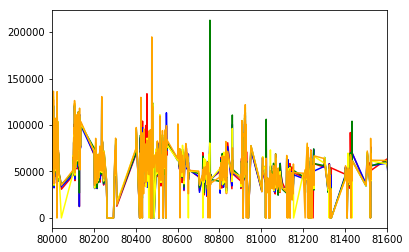

In [89]:
zip_x = income_clean_df["Zipcode"]
income12_y = income_clean_df["Total Households Income 2012"]
income13_y = income_clean_df["Total Households Income 2013"]
income14_y = income_clean_df["Total Households Income 2014"]
income15_y = income_clean_df["Total Households Income 2015"]
income16_y = income_clean_df["Total Households Income 2016"]

plt.plot(zip_x, income12_y, color="red", label="2012")
plt.plot(zip_x, income13_y, color="blue", label="2013")
plt.plot(zip_x, income14_y, color="green", label="2014")
plt.plot(zip_x, income15_y, color="yellow", label="2015")
plt.plot(zip_x, income16_y, color="orange", label="2016")

plt.xlim(80000, 81600)

#plt.savefig("../income.png")
plt.show()

In [ ]:
#merge on zip for cities

income_clean_df = pd.merge(zip_to_city_df, employment_2012_df, on='Zipcode', how='left')

income_clean_df.to_csv("Employment/semi_cleaned_employment_2012.csv", index=False)

income_clean_df.head()

In [47]:
#read excel files
employment_df = pd.read_csv("Employment/employment_2013.csv")

zip = employment_df['Id2']

population = employment_df['Total; Estimate; Population 16 years and over']
population_margin = employment_df['Total; Margin of Error; Population 16 years and over']
population_unemployment = employment_df['Unemployment rate; Estimate; Population 16 years and over']
total_unemployment = pd.to_numeric(population_unemployment, errors='coerce').fillna(0, downcast='infer')
population_unemployment_margin = employment_df['Unemployment rate; Margin of Error; Population 16 years and over']

sixteen = employment_df['Total; Estimate; AGE - 16 to 19 years']
sixteen_margin = employment_df['Total; Margin of Error; AGE - 16 to 19 years']
sixteen_unemployment = employment_df['Unemployment rate; Estimate; AGE - 16 to 19 years']
unemployment16 = pd.to_numeric(sixteen_unemployment, errors='coerce').fillna(0, downcast='infer')
sixteen_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 16 to 19 years']

twenty = employment_df['Total; Estimate; AGE - 20 to 24 years']
twenty_margin = employment_df['Total; Margin of Error; AGE - 20 to 24 years']
twenty_unemployment = employment_df['Unemployment rate; Estimate; AGE - 20 to 24 years']
unemployment20 = pd.to_numeric(twenty_unemployment, errors='coerce').fillna(0, downcast='infer')
twenty_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 20 to 24 years']

twenty_five = employment_df['Total; Estimate; AGE - 25 to 44 years']
twenty_five_margin = employment_df['Total; Margin of Error; AGE - 25 to 44 years']
twenty_five_unemployment = employment_df['Unemployment rate; Estimate; AGE - 25 to 44 years']
unemployment25 = pd.to_numeric(twenty_five_unemployment, errors='coerce').fillna(0, downcast='infer')
twenty_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 25 to 44 years']

#thirty = employment_df['Total; Estimate; AGE - 30 to 34 years']
#thirty_margin = employment_df['Total; Margin of Error; AGE - 30 to 34 years']
#thirty_unemployment = employment_df['Unemployment rate; Estimate; AGE - 30 to 34 years']
#thirty_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 30 to 34 years']

#thirty_five = employment_df['Total; Estimate; AGE - 35 to 44 years']
#thirty_five_margin = employment_df['Total; Margin of Error; AGE - 35 to 44 years']
#thirty_five_unemployment = employment_df['Unemployment rate; Estimate; AGE - 35 to 44 years']
#thirty_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 35 to 44 years']

forty_five = employment_df['Total; Estimate; AGE - 45 to 54 years']
forty_five_margin = employment_df['Total; Margin of Error; AGE - 45 to 54 years']
forty_five_unemployment = employment_df['Unemployment rate; Estimate; AGE - 45 to 54 years']
unemployment45 = pd.to_numeric(forty_five_unemployment, errors='coerce').fillna(0, downcast='infer')
forty_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 45 to 54 years']

fifty_five = employment_df['Total; Estimate; AGE - 55 to 64 years']
fifty_five_margin = employment_df['Total; Margin of Error; AGE - 55 to 64 years']
fifty_five_unemployment = employment_df['Unemployment rate; Estimate; AGE - 55 to 64 years']
unemployment55 = pd.to_numeric(fifty_five_unemployment, errors='coerce').fillna(0, downcast='infer')
fifty_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 55 to 64 years']

#sixty = employment_df['Total; Estimate; AGE - 60 to 64 years']
#sixty_margin = employment_df['Total; Margin of Error; AGE - 60 to 64 years']
#sixty_unemployment = employment_df['Unemployment rate; Estimate; AGE - 60 to 64 years']
#sixty_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 60 to 64 years']

sixty_five = employment_df['Total; Estimate; AGE - 65 to 74 years']
sixty_five_margin = employment_df['Total; Margin of Error; AGE - 65 to 74 years']
sixty_five_unemployment = employment_df['Unemployment rate; Estimate; AGE - 65 to 74 years']
unemployment65 = pd.to_numeric(sixty_five_unemployment, errors='coerce').fillna(0, downcast='infer')
sixty_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 65 to 74 years']

seventy_five = employment_df['Total; Estimate; AGE - 75 years and over']
seventy_five_margin = employment_df['Total; Margin of Error; AGE - 75 years and over']
seventy_five_unemployment = employment_df['Unemployment rate; Estimate; AGE - 75 years and over']
unemployment75 = pd.to_numeric(seventy_five_unemployment, errors='coerce').fillna(0, downcast='infer')
seventy_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 75 years and over']




employment_2013_df = pd.DataFrame({
    
    "Zipcode": zip,
    
    "Total Population 2013": population,
    "Total Population 2013 Margin of Error": population_margin,
    "Total Unemployment 2013": total_unemployment,
    "Total Unemployment 2013 margin of Error": population_unemployment_margin,
    
    "Age Group 16-19 2013": sixteen,
    "Age Group 16-19 2013 Margin of Error": sixteen_margin,
    "Age Group 16-19 2013 Unemployment": unemployment16,
    "Age Group 16-19 2013 Unemployment Margin of Error": sixteen_unemployment_margin,
    
    "Age Group 20-24 2013": twenty,
    "Age Group 20-24 2013 Margin of Error": twenty_margin,
    "Age Group 20-24 2013 Unemployment": unemployment20,
    "Age Group 20-24 2013 Unemployment Margin of Error": twenty_unemployment_margin,
    
    "Age Group 25-44 2013": twenty_five,
    "Age Group 25-44 2013 Margin of Error": twenty_five_margin,
    "Age Group 25-44 2013 Unemployment": unemployment25,
    "Age Group 25-44 2013 Unemployment Margin of Error": twenty_five_unemployment_margin,
    
    "Age Group 45-54 2013": forty_five,
    "Age Group 45-54 2013 Margin of Error": forty_five_margin,
    "Age Group 45-54 2013 Unemployment": unemployment45,
    "Age Group 45-54 2013 Unemployment Margin of Error": forty_five_unemployment_margin,        
    
    "Age Group 55-64 2013": fifty_five,
    "Age Group 55-64 2013 Margin of Error": fifty_five_margin,
    "Age Group 55-64 2013 Unemployment": unemployment55,
    "Age Group 55-64 2013 Unemployment Margin of Error": fifty_five_unemployment_margin,
    
    "Age Group 65-74 2013": sixty_five,
    "Age Group 65-74 2013 Margin of Error": sixty_five_margin,
    "Age Group 65-74 2013 Unemployment": unemployment65,
    "Age Group 65-74 2013 Unemployment Margin of Error": sixty_five_unemployment_margin,
    
    "Age Group 75+ 2013": seventy_five,
    "Age Group 75+ 2013 Margin of Error": seventy_five_margin,
    "Age Group 75+ 2013 Unemployment": unemployment75,
    "Age Group 75+ 2013 Unemployment Margin of Error": seventy_five_unemployment_margin,

})


In [48]:
avg_total_2013 = employment_2013_df["Total Unemployment 2013"].mean()
avg_group16_2013 = employment_2013_df["Age Group 16-19 2013 Unemployment"].mean()
avg_group20_2013 = employment_2013_df["Age Group 20-24 2013 Unemployment"].mean()
avg_group25_2013 = employment_2013_df["Age Group 25-44 2013 Unemployment"].mean()
avg_group45_2013 = employment_2013_df["Age Group 45-54 2013 Unemployment"].mean()
avg_group55_2013 = employment_2013_df["Age Group 55-64 2013 Unemployment"].mean()
avg_group65_2013 = employment_2013_df["Age Group 65-74 2013 Unemployment"].mean()
avg_group75_2013 = employment_2013_df["Age Group 75+ 2013 Unemployment"].mean()

In [ ]:
income_clean_df = pd.merge(zip_to_city_df, employment_2013_df, on='Zipcode', how='left')

income_clean_df.to_csv("Employment/semi_cleaned_employment_2013.csv", index=False)

income_clean_df.head()

In [75]:
#read excel files
employment_df = pd.read_csv("Employment/employment_2014.csv")

zip = employment_df['Id2']

population = employment_df['Total; Estimate; Population 16 years and over']
population_margin = employment_df['Total; Margin of Error; Population 16 years and over']
population_unemployment = employment_df['Unemployment rate; Estimate; Population 16 years and over']
total_unemployment = pd.to_numeric(population_unemployment, errors='coerce').fillna(0, downcast='infer')
population_unemployment_margin = employment_df['Unemployment rate; Margin of Error; Population 16 years and over']

sixteen = employment_df['Total; Estimate; AGE - 16 to 19 years']
sixteen_margin = employment_df['Total; Margin of Error; AGE - 16 to 19 years']
sixteen_unemployment = employment_df['Unemployment rate; Estimate; AGE - 16 to 19 years']
unemployment16 = pd.to_numeric(sixteen_unemployment, errors='coerce').fillna(0, downcast='infer')
sixteen_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 16 to 19 years']

twenty = employment_df['Total; Estimate; AGE - 20 to 24 years']
twenty_margin = employment_df['Total; Margin of Error; AGE - 20 to 24 years']
twenty_unemployment = employment_df['Unemployment rate; Estimate; AGE - 20 to 24 years']
unemployment20 = pd.to_numeric(twenty_unemployment, errors='coerce').fillna(0, downcast='infer')
twenty_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 20 to 24 years']

twenty_five = employment_df['Total; Estimate; AGE - 25 to 44 years']
twenty_five_margin = employment_df['Total; Margin of Error; AGE - 25 to 44 years']
unemployment25 = pd.to_numeric(twenty_five_unemployment, errors='coerce').fillna(0, downcast='infer')
twenty_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 25 to 44 years']

#thirty = employment_df['Total; Estimate; AGE - 30 to 34 years']
#thirty_margin = employment_df['Total; Margin of Error; AGE - 30 to 34 years']
#thirty_unemployment = employment_df['Unemployment rate; Estimate; AGE - 30 to 34 years']
#thirty_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 30 to 34 years']

#thirty_five = employment_df['Total; Estimate; AGE - 35 to 44 years']
#thirty_five_margin = employment_df['Total; Margin of Error; AGE - 35 to 44 years']
#thirty_five_unemployment = employment_df['Unemployment rate; Estimate; AGE - 35 to 44 years']
#thirty_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 35 to 44 years']

forty_five = employment_df['Total; Estimate; AGE - 45 to 54 years']
forty_five_margin = employment_df['Total; Margin of Error; AGE - 45 to 54 years']
forty_five_unemployment = employment_df['Unemployment rate; Estimate; AGE - 45 to 54 years']
unemployment45 = pd.to_numeric(forty_five_unemployment, errors='coerce').fillna(0, downcast='infer')
forty_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 45 to 54 years']

fifty_five = employment_df['Total; Estimate; AGE - 55 to 64 years']
fifty_five_margin = employment_df['Total; Margin of Error; AGE - 55 to 64 years']
fifty_five_unemployment = employment_df['Unemployment rate; Estimate; AGE - 55 to 64 years']
unemployment55 = pd.to_numeric(fifty_five_unemployment, errors='coerce').fillna(0, downcast='infer')
fifty_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 55 to 64 years']

#sixty = employment_df['Total; Estimate; AGE - 60 to 64 years']
#sixty_margin = employment_df['Total; Margin of Error; AGE - 60 to 64 years']
#sixty_unemployment = employment_df['Unemployment rate; Estimate; AGE - 60 to 64 years']
#sixty_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 60 to 64 years']

sixty_five = employment_df['Total; Estimate; AGE - 65 to 74 years']
sixty_five_margin = employment_df['Total; Margin of Error; AGE - 65 to 74 years']
sixty_five_unemployment = employment_df['Unemployment rate; Estimate; AGE - 65 to 74 years']
unemployment65 = pd.to_numeric(sixty_five_unemployment, errors='coerce').fillna(0, downcast='infer')
sixty_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 65 to 74 years']

seventy_five = employment_df['Total; Estimate; AGE - 75 years and over']
seventy_five_margin = employment_df['Total; Margin of Error; AGE - 75 years and over']
seventy_five_unemployment = employment_df['Unemployment rate; Estimate; AGE - 75 years and over']
unemployment75 = pd.to_numeric(seventy_five_unemployment, errors='coerce').fillna(0, downcast='infer')
seventy_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 75 years and over']




employment_2014_df = pd.DataFrame({
    
    "Zipcode": zip,
    
    "Total Population 2014": population,
    "Total Population 2014 Margin of Error": population_margin,
    "Total Unemployment 2014":total_unemployment,
    "Total Unemployment 2014 margin of Error": population_unemployment_margin,
    
    "Age Group 16-19 2014": sixteen,
    "Age Group 16-19 2014 Margin of Error": sixteen_margin,
    "Age Group 16-19 2014 Unemployment": unemployment16,
    "Age Group 16-19 2014 Unemployment Margin of Error": sixteen_unemployment_margin,
    
    "Age Group 20-24 2014": twenty,
    "Age Group 20-24 2014 Margin of Error": twenty_margin,
    "Age Group 20-24 2014 Unemployment": unemployment20,
    "Age Group 20-24 2014 Unemployment Margin of Error": twenty_unemployment_margin,
    
    "Age Group 25-44 2014": twenty_five,
    "Age Group 25-44 2014 Margin of Error": twenty_five_margin,
    "Age Group 25-44 2014 Unemployment": unemployment25,
    "Age Group 25-44 2014 Unemployment Margin of Error": twenty_five_unemployment_margin,
    
    "Age Group 45-54 2014": forty_five,
    "Age Group 45-54 2014 Margin of Error": forty_five_margin,
    "Age Group 45-54 2014 Unemployment": unemployment45,
    "Age Group 45-54 2014 Unemployment Margin of Error": forty_five_unemployment_margin,        
    
    "Age Group 55-64 2014": fifty_five,
    "Age Group 55-64 2014 Margin of Error": fifty_five_margin,
    "Age Group 55-64 2014 Unemployment": unemployment55,
    "Age Group 55-64 2014 Unemployment Margin of Error": fifty_five_unemployment_margin,
    
    "Age Group 65-74 2014": sixty_five,
    "Age Group 65-74 2014 Margin of Error": sixty_five_margin,
    "Age Group 65-74 2014 Unemployment": unemployment65,
    "Age Group 65-74 2014 Unemployment Margin of Error": sixty_five_unemployment_margin,
    
    "Age Group 75+ 2014": seventy_five,
    "Age Group 75+ 2014 Margin of Error": seventy_five_margin,
    "Age Group 75+ 2014 Unemployment": unemployment75,
    "Age Group 75+ 2014 Unemployment Margin of Error": seventy_five_unemployment_margin,

})


In [55]:
avg_total_2014 = employment_2014_df["Total Unemployment 2014"].mean()
avg_group16_2014 = employment_2014_df["Age Group 16-19 2014 Unemployment"].mean()
avg_group20_2014 = employment_2014_df["Age Group 20-24 2014 Unemployment"].mean()
avg_group25_2014 = employment_2014_df["Age Group 25-44 2014 Unemployment"].mean()
avg_group45_2014 = employment_2014_df["Age Group 45-54 2014 Unemployment"].mean()
avg_group55_2014 = employment_2014_df["Age Group 55-64 2014 Unemployment"].mean()
avg_group65_2014 = employment_2014_df["Age Group 65-74 2014 Unemployment"].mean()
avg_group75_2014 = employment_2014_df["Age Group 75+ 2014 Unemployment"].mean()

In [ ]:
income_clean_df = pd.merge(zip_to_city_df, employment_2014_df, on='Zipcode', how='left')

income_clean_df.to_csv("Employment/semi_cleaned_employment_2014.csv", index=False)

income_clean_df.head()

In [62]:
#read excel files
employment_df = pd.read_csv("Employment/employment_2015.csv")

zip = employment_df['Id2']

population = employment_df['Total; Estimate; Population 16 years and over']
population_margin = employment_df['Total; Margin of Error; Population 16 years and over']
population_unemployment = employment_df['Unemployment rate; Estimate; Population 16 years and over']
total_unemployment = pd.to_numeric(population_unemployment, errors='coerce').fillna(0, downcast='infer')
population_unemployment_margin = employment_df['Unemployment rate; Margin of Error; Population 16 years and over']

sixteen = employment_df['Total; Estimate; AGE - 16 to 19 years']
sixteen_margin = employment_df['Total; Margin of Error; AGE - 16 to 19 years']
sixteen_unemployment = employment_df['Unemployment rate; Estimate; AGE - 16 to 19 years']
unemployment16 = pd.to_numeric(sixteen_unemployment, errors='coerce').fillna(0, downcast='infer')
sixteen_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 16 to 19 years']

twenty = employment_df['Total; Estimate; AGE - 20 to 24 years']
twenty_margin = employment_df['Total; Margin of Error; AGE - 20 to 24 years']
twenty_unemployment = employment_df['Unemployment rate; Estimate; AGE - 20 to 24 years']
unemployment20 = pd.to_numeric(twenty_unemployment, errors='coerce').fillna(0, downcast='infer')
twenty_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 20 to 24 years']

twenty_five = employment_df['Total; Estimate; AGE - 25 to 29 years']
twenty_five_margin = employment_df['Total; Margin of Error; AGE - 25 to 29 years']
twenty_five_unemployment = employment_df['Unemployment rate; Estimate; AGE - 25 to 29 years']
unemployment25 = pd.to_numeric(twenty_five_unemployment, errors='coerce').fillna(0, downcast='infer')
twenty_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 25 to 29 years']

thirty = employment_df['Total; Estimate; AGE - 30 to 34 years']
thirty_margin = employment_df['Total; Margin of Error; AGE - 30 to 34 years']
thirty_unemployment = employment_df['Unemployment rate; Estimate; AGE - 30 to 34 years']
unemployment30 = pd.to_numeric(thirty_unemployment, errors='coerce').fillna(0, downcast='infer')
thirty_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 30 to 34 years']

thirty_five = employment_df['Total; Estimate; AGE - 35 to 44 years']
thirty_five_margin = employment_df['Total; Margin of Error; AGE - 35 to 44 years']
unemployment35 = pd.to_numeric(thirty_five_unemployment, errors='coerce').fillna(0, downcast='infer')
thirty_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 35 to 44 years']

forty_five = employment_df['Total; Estimate; AGE - 45 to 54 years']
forty_five_margin = employment_df['Total; Margin of Error; AGE - 45 to 54 years']
forty_five_unemployment = employment_df['Unemployment rate; Estimate; AGE - 45 to 54 years']
unemployment45 = pd.to_numeric(forty_five_unemployment, errors='coerce').fillna(0, downcast='infer')
forty_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 45 to 54 years']

fifty_five = employment_df['Total; Estimate; AGE - 55 to 59 years']
fifty_five_margin = employment_df['Total; Margin of Error; AGE - 55 to 59 years']
fifty_five_unemployment = employment_df['Unemployment rate; Estimate; AGE - 55 to 59 years']
unemployment55 = pd.to_numeric(fifty_five_unemployment, errors='coerce').fillna(0, downcast='infer')
fifty_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 55 to 59 years']

sixty = employment_df['Total; Estimate; AGE - 60 to 64 years']
sixty_margin = employment_df['Total; Margin of Error; AGE - 60 to 64 years']
sixty_unemployment = employment_df['Unemployment rate; Estimate; AGE - 60 to 64 years']
unemployment60 = pd.to_numeric(sixty_unemployment, errors='coerce').fillna(0, downcast='infer')
sixty_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 60 to 64 years']

sixty_five = employment_df['Total; Estimate; AGE - 65 to 74 years']
sixty_five_margin = employment_df['Total; Margin of Error; AGE - 65 to 74 years']
sixty_five_unemployment = employment_df['Unemployment rate; Estimate; AGE - 65 to 74 years']
unemployment65 = pd.to_numeric(sixty_five_unemployment, errors='coerce').fillna(0, downcast='infer')
sixty_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 65 to 74 years']

seventy_five = employment_df['Total; Estimate; AGE - 75 years and over']
seventy_five_margin = employment_df['Total; Margin of Error; AGE - 75 years and over']
seventy_five_unemployment = employment_df['Unemployment rate; Estimate; AGE - 75 years and over']
unemployment75 = pd.to_numeric(seventy_five_unemployment, errors='coerce').fillna(0, downcast='infer')
seventy_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 75 years and over']




employment_2015_df = pd.DataFrame({
    
    "Zipcode": zip,
    
    "Total Population 2015": population,
    "Total Population 2015 Margin of Error": population_margin,
    "Total Unemployment 2015": total_unemployment,
    "Total Unemployment 2015 margin of Error": population_unemployment_margin,
    
    "Age Group 16-19 2015": sixteen,
    "Age Group 16-19 2015 Margin of Error": sixteen_margin,
    "Age Group 16-19 2015 Unemployment": unemployment16,
    "Age Group 16-19 2015 Unemployment Margin of Error": sixteen_unemployment_margin,
    
    "Age Group 20-24 2015": twenty,
    "Age Group 20-24 2015 Margin of Error": twenty_margin,
    "Age Group 20-24 2015 Unemployment": unemployment20,
    "Age Group 20-24 2015 Unemployment Margin of Error": twenty_unemployment_margin,
    
    "Age Group 25-29 2015": twenty_five,
    "Age Group 25-29 2015 Margin of Error": twenty_five_margin,
    "Age Group 25-44 2015 Unemployment": unemployment25 + unemployment30 + unemployment35, 
    "Age Group 25-29 2015 Unemployment Margin of Error": twenty_five_unemployment_margin,
    
    #"Age Group 30-34 2015": thirty,
    #"Age Group 30-34 2015 Margin of Error": thirty_margin,
    #"Age Group 30-34 2015 Unemployment": unemployment30,
    #"Age Group 30-34 2015 Unemployment Margin of Error": thirty_unemployment_margin,

    #"Age Group 35-44 2015": thirty_five,
    #"Age Group 35-44 2015 Margin of Error": thirty_five_margin,
    #"Age Group 35-44 2015 Unemployment": unemployment35,
    #"Age Group 35-44 2015 Unemployment Margin of Error": thirty_five_unemployment_margin,

    "Age Group 45-54 2015": forty_five,
    "Age Group 45-54 2015 Margin of Error": forty_five_margin,
    "Age Group 45-54 2015 Unemployment": unemployment45,
    "Age Group 45-54 2015 Unemployment Margin of Error": forty_five_unemployment_margin,        
    
    "Age Group 55-64 2015": fifty_five,
    "Age Group 55-64 2015 Margin of Error": fifty_five_margin,
    "Age Group 55-64 2015 Unemployment": unemployment55,
    "Age Group 55-64 2015 Unemployment Margin of Error": fifty_five_unemployment_margin,

    "Age Group 60-64 2015": sixty,
    "Age Group 60-64 2015 Margin of Error": sixty_margin,
    "Age Group 60-64 2015 Unemployment": unemployment60,
    "Age Group 60-64 2015 Unemployment Margin of Error": sixty_unemployment_margin,
    
    "Age Group 65-74 2015": sixty_five,
    "Age Group 65-74 2015 Margin of Error": sixty_five_margin,
    "Age Group 65-74 2015 Unemployment": unemployment65,
    "Age Group 65-74 2015 Unemployment Margin of Error": sixty_five_unemployment_margin,
    
    "Age Group 75+ 2015": seventy_five,
    "Age Group 75+ 2015 Margin of Error": seventy_five_margin,
    "Age Group 75+ 2015 Unemployment": unemployment75,
    "Age Group 75+ 2015 Unemployment Margin of Error": seventy_five_unemployment_margin,

})


In [63]:
avg_total_2015 = employment_2015_df["Total Unemployment 2015"].mean()
avg_group16_2015 = employment_2015_df["Age Group 16-19 2015 Unemployment"].mean()
avg_group20_2015 = employment_2015_df["Age Group 20-24 2015 Unemployment"].mean()
avg_group25_2015 = employment_2015_df["Age Group 25-44 2015 Unemployment"].mean()
avg_group45_2015 = employment_2015_df["Age Group 45-54 2015 Unemployment"].mean()
avg_group55_2015 = employment_2015_df["Age Group 55-64 2015 Unemployment"].mean()
avg_group65_2015 = employment_2015_df["Age Group 65-74 2015 Unemployment"].mean()
avg_group75_2015 = employment_2015_df["Age Group 75+ 2015 Unemployment"].mean()

In [ ]:
income_clean_df = pd.merge(zip_to_city_df, employment_2015_df, on='Zipcode', how='left')

income_clean_df.to_csv("Employment/semi_cleaned_employment_2015.csv", index=False)

income_clean_df.head()

In [76]:
#read excel files
employment_df = pd.read_csv("Employment/employment_2016.csv")

zip = employment_df['Id2']

population = employment_df['Total; Estimate; Population 16 years and over']
population_margin = employment_df['Total; Margin of Error; Population 16 years and over']
population_unemployment = employment_df['Unemployment rate; Estimate; Population 16 years and over']
total_unemployment = pd.to_numeric(population_unemployment, errors='coerce').fillna(0, downcast='infer')
population_unemployment_margin = employment_df['Unemployment rate; Margin of Error; Population 16 years and over']

sixteen = employment_df['Total; Estimate; AGE - 16 to 19 years']
sixteen_margin = employment_df['Total; Margin of Error; AGE - 16 to 19 years']
sixteen_unemployment = employment_df['Unemployment rate; Estimate; AGE - 16 to 19 years']
unemployment16 = pd.to_numeric(sixteen_unemployment, errors='coerce').fillna(0, downcast='infer')
sixteen_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 16 to 19 years']

twenty = employment_df['Total; Estimate; AGE - 20 to 24 years']
twenty_margin = employment_df['Total; Margin of Error; AGE - 20 to 24 years']
twenty_unemployment = employment_df['Unemployment rate; Estimate; AGE - 20 to 24 years']
unemployment20 = pd.to_numeric(twenty_unemployment, errors='coerce').fillna(0, downcast='infer')
twenty_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 20 to 24 years']

twenty_five = employment_df['Total; Estimate; AGE - 25 to 29 years']
twenty_five_margin = employment_df['Total; Margin of Error; AGE - 25 to 29 years']
twenty_five_unemployment = employment_df['Unemployment rate; Estimate; AGE - 25 to 29 years']
unemployment25 = pd.to_numeric(twenty_five_unemployment, errors='coerce').fillna(0, downcast='infer')
twenty_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 25 to 29 years']

thirty = employment_df['Total; Estimate; AGE - 30 to 34 years']
thirty_margin = employment_df['Total; Margin of Error; AGE - 30 to 34 years']
thirty_unemployment = employment_df['Unemployment rate; Estimate; AGE - 30 to 34 years']
unemployment30 = pd.to_numeric(thirty_unemployment, errors='coerce').fillna(0, downcast='infer')
thirty_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 30 to 34 years']

thirty_five = employment_df['Total; Estimate; AGE - 35 to 44 years']
thirty_five_margin = employment_df['Total; Margin of Error; AGE - 35 to 44 years']
thirty_five_unemployment = employment_df['Unemployment rate; Estimate; AGE - 35 to 44 years']
unemployment35 = pd.to_numeric(thirty_five_unemployment, errors='coerce').fillna(0, downcast='infer')
thirty_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 35 to 44 years']

forty_five = employment_df['Total; Estimate; AGE - 45 to 54 years']
forty_five_margin = employment_df['Total; Margin of Error; AGE - 45 to 54 years']
forty_five_unemployment = employment_df['Unemployment rate; Estimate; AGE - 45 to 54 years']
unemployment45 = pd.to_numeric(forty_five_unemployment, errors='coerce').fillna(0, downcast='infer')
forty_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 45 to 54 years']

fifty_five = employment_df['Total; Estimate; AGE - 55 to 59 years']
fifty_five_margin = employment_df['Total; Margin of Error; AGE - 55 to 59 years']
fifty_five_unemployment = employment_df['Unemployment rate; Estimate; AGE - 55 to 59 years']
unemployment55 = pd.to_numeric(fifty_five_unemployment, errors='coerce').fillna(0, downcast='infer')
fifty_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 55 to 59 years']

sixty = employment_df['Total; Estimate; AGE - 60 to 64 years']
sixty_margin = employment_df['Total; Margin of Error; AGE - 60 to 64 years']
sixty_unemployment = employment_df['Unemployment rate; Estimate; AGE - 60 to 64 years']
unemployment60 = pd.to_numeric(sixty_unemployment, errors='coerce').fillna(0, downcast='infer')
sixty_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 60 to 64 years']

sixty_five = employment_df['Total; Estimate; AGE - 65 to 74 years']
sixty_five_margin = employment_df['Total; Margin of Error; AGE - 65 to 74 years']
sixty_five_unemployment = employment_df['Unemployment rate; Estimate; AGE - 65 to 74 years']
unemployment65 = pd.to_numeric(sixty_five_unemployment, errors='coerce').fillna(0, downcast='infer')
sixty_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 65 to 74 years']

seventy_five = employment_df['Total; Estimate; AGE - 75 years and over']
seventy_five_margin = employment_df['Total; Margin of Error; AGE - 75 years and over']
seventy_five_unemployment = employment_df['Unemployment rate; Estimate; AGE - 75 years and over']
unemployment75 = pd.to_numeric(seventy_five_unemployment, errors='coerce').fillna(0, downcast='infer')
seventy_five_unemployment_margin = employment_df['Unemployment rate; Margin of Error; AGE - 75 years and over']




employment_2016_df = pd.DataFrame({
    
    "Zipcode": zip,
    
    "Total Population 2016": population,
    "Total Population 2016 Margin of Error": population_margin,
    "Total Unemployment 2016": total_unemployment,
    "Total Unemployment 2016 margin of Error": population_unemployment_margin,
    
    "Age Group 16-19 2016": sixteen,
    "Age Group 16-19 2016 Margin of Error": sixteen_margin,
    "Age Group 16-19 2016 Unemployment": unemployment16,
    "Age Group 16-19 2016 Unemployment Margin of Error": sixteen_unemployment_margin,
    
    "Age Group 20-24 2016": twenty,
    "Age Group 20-24 2016 Margin of Error": twenty_margin,
    "Age Group 20-24 2016 Unemployment": unemployment20,
    "Age Group 20-24 2016 Unemployment Margin of Error": twenty_unemployment_margin,
    
    "Age Group 25-29 2016": twenty_five,
    "Age Group 25-29 2016 Margin of Error": twenty_five_margin,
    "Age Group 25-44 2016 Unemployment": unemployment25 + unemployment30 + unemployment35,
    "Age Group 25-29 2016 Unemployment Margin of Error": twenty_five_unemployment_margin,
    
    #"Age Group 30-34 2016": thirty,
    #"Age Group 30-34 2016 Margin of Error": thirty_margin,
    #"Age Group 30-34 2016 Unemployment": unemployment30,
    #"Age Group 30-34 2016 Unemployment Margin of Error": thirty_unemployment_margin,

    #"Age Group 35-44 2016": thirty_five,
    #"Age Group 35-44 2016 Margin of Error": thirty_five_margin,
    #"Age Group 35-44 2016 Unemployment": unemployment35,
    #"Age Group 35-44 2016 Unemployment Margin of Error": thirty_five_unemployment_margin,

    "Age Group 45-54 2016": forty_five,
    "Age Group 45-54 2016 Margin of Error": forty_five_margin,
    "Age Group 45-54 2016 Unemployment": unemployment45,
    "Age Group 45-54 2016 Unemployment Margin of Error": forty_five_unemployment_margin,        
    
    "Age Group 55-64 2016": fifty_five,
    "Age Group 55-64 2016 Margin of Error": fifty_five_margin,
    "Age Group 55-64 2016 Unemployment": unemployment55,
    "Age Group 55-64 2016 Unemployment Margin of Error": fifty_five_unemployment_margin,

    "Age Group 60-64 2016": sixty,
    "Age Group 60-64 2016 Margin of Error": sixty_margin,
    "Age Group 60-64 2016 Unemployment": unemployment60,
    "Age Group 60-64 2016 Unemployment Margin of Error": sixty_unemployment_margin,
    
    "Age Group 65-74 2016": sixty_five,
    "Age Group 65-74 2016 Margin of Error": sixty_five_margin,
    "Age Group 65-74 2016 Unemployment": unemployment65,
    "Age Group 65-74 2016 Unemployment Margin of Error": sixty_five_unemployment_margin,
    
    "Age Group 75+ 2016": seventy_five,
    "Age Group 75+ 2016 Margin of Error": seventy_five_margin,
    "Age Group 75+ 2016 Unemployment": unemployment75,
    "Age Group 75+ 2016 Unemployment Margin of Error": seventy_five_unemployment_margin,

})



In [67]:
avg_total_2016 = employment_2016_df["Total Unemployment 2016"].mean()
avg_group16_2016 = employment_2016_df["Age Group 16-19 2016 Unemployment"].mean()
avg_group20_2016 = employment_2016_df["Age Group 20-24 2016 Unemployment"].mean()
avg_group25_2016 = employment_2016_df["Age Group 25-44 2016 Unemployment"].mean()
avg_group45_2016 = employment_2016_df["Age Group 45-54 2016 Unemployment"].mean()
avg_group55_2016 = employment_2016_df["Age Group 55-64 2016 Unemployment"].mean()
avg_group65_2016 = employment_2016_df["Age Group 65-74 2016 Unemployment"].mean()
avg_group75_2016 = employment_2016_df["Age Group 75+ 2016 Unemployment"].mean()

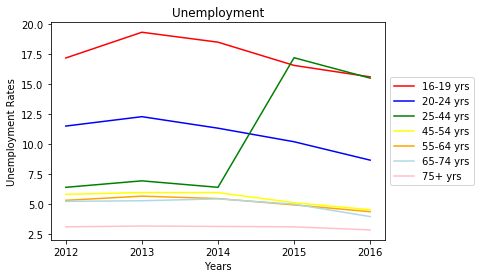

<Figure size 432x288 with 0 Axes>

In [85]:
#x_years = ["16-19 yrs", "20-24 yrs", "25-44 yrs", "45-54 yrs", "55-64 yrs", "65-74 yrs", "75+ yrs"]
#y_2012 = [avg_group16_2012, avg_group20_2012, avg_group25_2012, avg_group45_2012, avg_group55_2012, avg_group65_2012, avg_group75_2012]

x_years = ["2012", "2013", "2014", "2015", "2016"]
y_group16 = [avg_group16_2012, avg_group16_2013, avg_group16_2014, avg_group16_2015, avg_group16_2016]
y_group20 = [avg_group20_2012, avg_group20_2013, avg_group20_2014, avg_group20_2015, avg_group20_2016]
y_group25 = [avg_group25_2012, avg_group25_2013, avg_group25_2014, avg_group25_2015, avg_group25_2016]
y_group45 = [avg_group45_2012, avg_group45_2013, avg_group45_2014, avg_group45_2015, avg_group45_2016]
y_group55 = [avg_group55_2012, avg_group55_2013, avg_group55_2014, avg_group55_2015, avg_group55_2016]
y_group65 = [avg_group65_2012, avg_group65_2013, avg_group65_2014, avg_group65_2015, avg_group65_2016]
y_group75 = [avg_group75_2012, avg_group75_2013, avg_group75_2014, avg_group75_2015, avg_group75_2016]

plt.plot(x_years, y_group16, color="red", label="16-19 yrs")
plt.plot(x_years, y_group20, color="blue", label="20-24 yrs")
plt.plot(x_years, y_group25, color="green", label="25-44 yrs")
plt.plot(x_years, y_group45, color="yellow", label="45-54 yrs")
plt.plot(x_years, y_group55, color="orange", label="55-64 yrs")
plt.plot(x_years, y_group65, color="lightblue", label="65-74 yrs")
plt.plot(x_years, y_group75, color="pink", label="75+ yrs")

plt.title("Unemployment")
plt.xlabel("Years")
plt.ylabel("Unemployment Rates")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.figure()
#plt.savefig("../income.png")
plt.show()

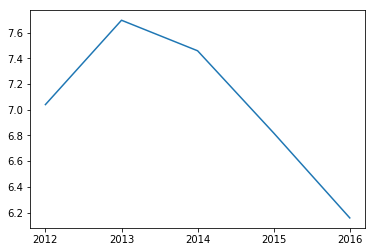

In [86]:
x_years = ["2012", "2013", "2014", "2015", "2016"]
y_group_total = [avg_total_2012, avg_total_2013, avg_total_2014, avg_total_2015, avg_total_2016]
plt.plot(x_years, y_group_total)
plt.show()

In [14]:
income_clean_df = pd.merge(zip_to_city_df, employment_2016_df, on='Zipcode', how='left')

income_clean_df.to_csv("Employment/semi_cleaned_employment_2016.csv", index=False)

income_clean_df.head()

NameError: name 'zip_to_city_df' is not defined

In [ ]:
zip_x = income_clean_df["Zipcode"]
income12_y = income_clean_df["Total Households Income 2012"].interpolate()


plt.plot(zip_x, income12_y, color="red", label="2012")
#plt.plot(zip_x, income13_y, color="blue", label="2013")
#plt.plot(zip_x, income14_y, color="green", label="2014")
#plt.plot(zip_x, income15_y, color="yellow", label="2015")
#plt.plot(zip_x, income16_y, color="orange", label="2016")

#plt.xlim(80000, 81700)
#plt.savefig("../Images/income.png")
plt.show()
